In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 이웃한 비슷한 색상의 픽셀은 같은 색으로 색칠하는 함수 (meanshift는 값이 숫자인데 차이가 작은 값을 같은 색으로 segmentation 하려고)
def floodFillPostProcess(src, diff = (2, 2, 2)):
    img = src.copy()
    rows, cols = img.shape[ : 2]
    mask = np.zeros(shape = (rows + 2, cols + 2), dtype = np.uint8)
    for y in range(rows):
        for x in range(cols):
            if mask[y + 1, x + 1] == 0:
                r = np.random.randint(256)
                g = np.random.randint(256)
                b = np.random.randint(256)
                cv2.floodFill(img, mask, (x, y), (b, g, r), diff, diff)
    return img

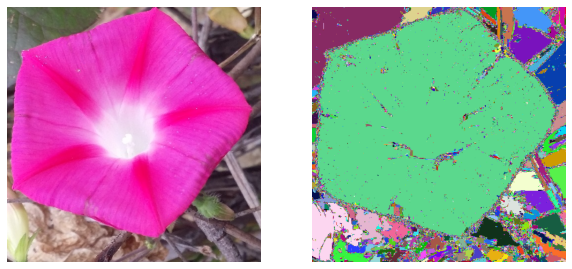

In [3]:
src = cv2.imread('../segmentation_rsc/flower.jpg')
srcrgb = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
dst1 = floodFillPostProcess(src, diff = (5, 5, 5))

plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
plt.axis('off')
plt.imshow(srcrgb)

plt.subplot(1, 2, 2)
plt.axis('off')
plt.imshow(dst1)

plt.show()

In [4]:
term_crit = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 2)
res = cv2.pyrMeanShiftFiltering(src, sp = 3, sr = 20, maxLevel = 4, termcrit = term_crit)
dst2 = floodFillPostProcess(res)

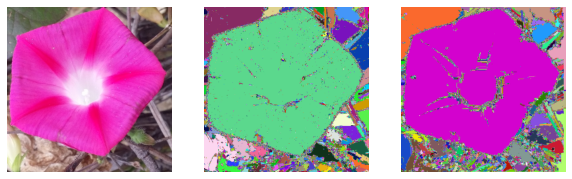

In [5]:
plt.figure(figsize = (10, 5))
plt.subplot(1, 3, 1)
plt.axis('off')
plt.imshow(srcrgb)

plt.subplot(1, 3, 2)
plt.axis('off')
plt.imshow(dst1)

plt.subplot(1, 3, 3)
plt.axis('off')
plt.imshow(dst2)


plt.show()